In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
df=load_digits()

In [3]:
print(df.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

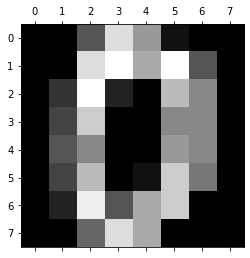

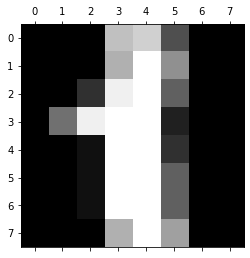

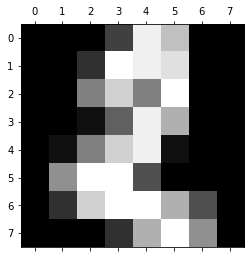

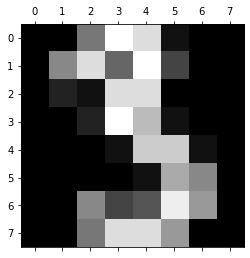

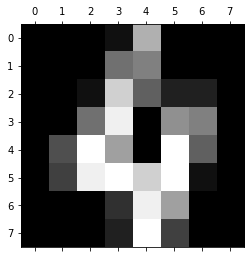

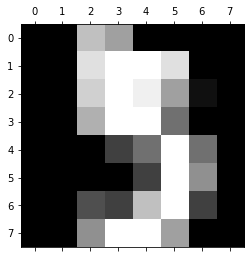

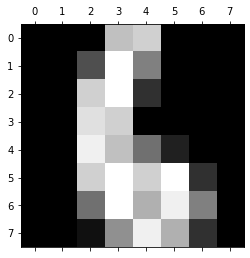

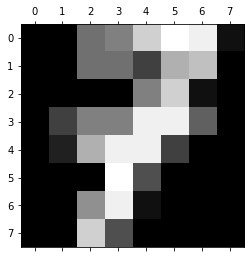

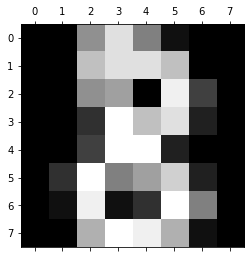

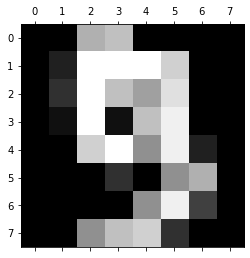

In [4]:
plt.gray()
for i in range(10):
    plt.matshow(df.images[i])
    plt.show()

In [5]:
df.target[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
XTrain,XTest,YTrain,YTest=train_test_split(df.data,df.target,test_size=0.33,random_state=42)

In [12]:
model = LogisticRegression(max_iter=10000)
model.fit(XTrain,YTrain)
model.intercept_

array([ 4.51574884, -3.90490691,  0.74846671, -2.29531787, 12.91341696,
       -6.38759908, -0.5640844 ,  0.18500324,  0.27702644, -5.48775392])

In [13]:
model.coef_

array([[ 0.00000000e+00, -5.03443563e-03, -2.41696277e-02,
        -1.42596981e-03,  3.36498573e-02, -1.29133583e-01,
        -1.35222528e-01, -2.62260033e-02, -1.81608096e-06,
        -5.85296266e-02, -4.59923201e-03,  1.26746080e-01,
        -2.36514502e-02,  6.12798343e-02, -8.28972810e-02,
        -2.28945676e-02, -3.17876572e-03, -1.08502557e-02,
         7.91360418e-02, -1.32751895e-02, -3.50050448e-01,
         1.42514220e-01,  1.75458508e-02, -5.76796166e-03,
        -1.58922878e-03,  7.88308979e-02,  1.31431674e-01,
        -1.15681731e-01, -3.96856972e-01,  4.11972376e-02,
         5.89488547e-02, -1.56362535e-04,  0.00000000e+00,
         1.18537209e-01,  8.15433189e-02, -1.28011939e-01,
        -3.18303272e-01,  2.43679539e-02,  5.24065974e-02,
         0.00000000e+00, -3.14180453e-04, -1.91012263e-02,
         2.03781093e-01, -1.81015376e-01, -1.58966212e-01,
         7.47616198e-02,  3.97702806e-02, -1.94452815e-05,
        -1.24186154e-03, -9.67522733e-02,  1.31514402e-0

In [14]:
model.score(XTest,YTest)*100

97.3063973063973

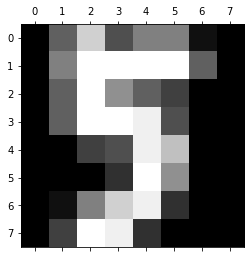

In [20]:
plt.matshow(df.images[33])

In [21]:
df.target[33]

5

In [22]:
model.predict([df.data[33]])

array([5])

In [39]:
model.predict(df.data[0:10])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
# to find out where the model is wrong
YPredict=model.predict(XTest)
# confusion matrix
# visualize with a pandas dataframe
pd.DataFrame(confusion_matrix(YTest,YPredict),columns=['Predicted 0','Predicted 1','Predicted 2','Predicted 3','Predicted 4','Predicted 5','Predicted 6','Predicted 7','Predicted 8','Predicted 9'],index=['Actual 0','Actual 1','Actual 2','Actual 3','Actual 4','Actual 5','Actual 6','Actual 7','Actual 8','Actual 9'])


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
Actual 0,55,0,0,0,0,0,0,0,0,0
Actual 1,0,52,1,0,0,0,0,0,2,0
Actual 2,0,0,52,0,0,0,0,0,0,0
Actual 3,0,0,1,54,0,1,0,0,0,0
Actual 4,0,1,0,0,63,0,0,0,0,0
Actual 5,0,1,0,0,0,70,1,0,0,1
Actual 6,0,0,0,0,0,1,56,0,0,0
Actual 7,0,0,0,0,0,1,0,61,0,0
Actual 8,0,1,0,0,0,1,0,0,50,0
Actual 9,0,0,0,1,0,0,0,0,2,65


Text(69.0, 0.5, 'Actual Value')

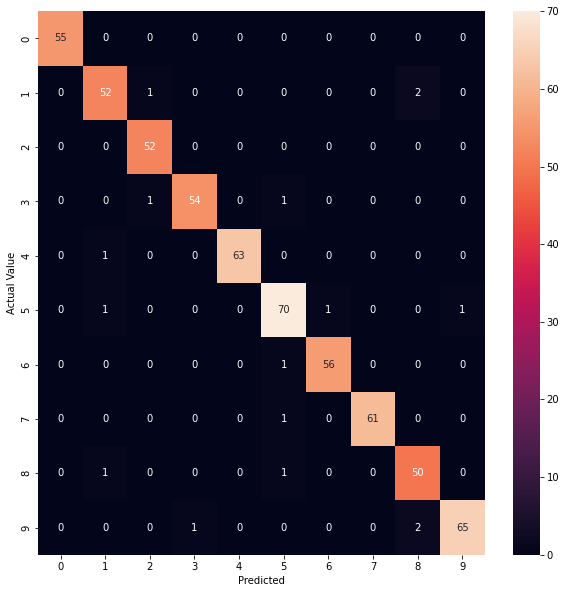

In [52]:
# heatmap
confmatrix=confusion_matrix(YTest,YPredict)
plt.figure(figsize=(10,10))
sns.heatmap(confmatrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel("Actual Value")